In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('clickbait_data.csv')

In [3]:
df.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [4]:
X = df['headline'].values

In [5]:
y = df['clickbait'].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=36)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(27200,) (4800,) (27200,) (4800,)


In [9]:
from tensorflow.keras.layers import TextVectorization

In [10]:
vocab_size = 6000
maxlen = 600

vectorizer = TextVectorization(max_tokens=vocab_size, output_sequence_length=maxlen,output_mode="int")

vectorizer.adapt(X_train)

X_train = vectorizer(X_train)
X_test = vectorizer(X_test)

In [11]:
X_train

<tf.Tensor: shape=(27200, 600), dtype=int64, numpy=
array([[2666,   11, 4901, ...,    0,    0,    0],
       [   4,  315,  197, ...,    0,    0,    0],
       [ 999,   10,  170, ...,    0,    0,    0],
       ...,
       [ 152, 1792,  424, ...,    0,    0,    0],
       [  27,  319,  582, ...,    0,    0,    0],
       [   1,    2,  599, ...,    0,    0,    0]], dtype=int64)>

In [12]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'to',
 'in',
 'the',
 'of',
 'you',
 'a',
 'for',
 'and',
 'on',
 'your',
 'is',
 'are',
 'that',
 'this',
 'with',
 'at',
 'will',
 'from',
 'us',
 'new',
 'about',
 'what',
 'who',
 'things',
 'people',
 'how',
 'which',
 'can',
 'as',
 'we',
 'make',
 'know',
 'by',
 'be',
 'after',
 '17',
 'do',
 '21',
 'should',
 'have',
 'these',
 'based',
 'actually',
 '19',
 'all',
 'over',
 'times',
 'their',
 'it',
 'up',
 'an',
 'its',
 'was',
 'out',
 'first',
 'like',
 'if',
 '2015',
 'best',
 'more',
 'or',
 'one',
 'most',
 'when',
 'need',
 'heres',
 'life',
 'has',
 'just',
 'his',
 'world',
 'time',
 'dead',
 '15',
 '23',
 '18',
 'her',
 'killed',
 'get',
 'dies',
 'day',
 'every',
 'ever',
 'president',
 'into',
 'two',
 'were',
 'zodiac',
 'youre',
 'love',
 'too',
 'says',
 'real',
 'not',
 'uk',
 'favorite',
 'everyone',
 'british',
 '22',
 'way',
 'now',
 'ways',
 'man',
 'kills',
 'i',
 'years',
 'sign',
 'australian',
 '16',
 'photos',
 'only',
 'no',
 'wins',
 

In [13]:
vectorizer('Can you believe that')[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 29,   6, 835,  14,   0,   0,   0,   0,   0,   0], dtype=int64)>

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,Flatten

In [15]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim = 32, input_length=maxlen))
model.add(Bidirectional(LSTM(32, return_sequences=True, activation = 'tanh')))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation = 'relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 32)           192000    
                                                                 
 bidirectional (Bidirectiona  (None, 600, 64)          16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 600, 128)          8320      
                                                                 
 dropout (Dropout)           (None, 600, 128)          0         
                                                                 
 dense_1 (Dense)             (None, 600, 256)          33024     
                                                                 
 dropout_1 (Dropout)         (None, 600, 256)          0         
                                                        

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=3,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='weights.h5',
        monitor='val_accuracy', 
        mode='max', 
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    )
]

In [18]:
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, validation_data=(X_test, y_test), epochs=10, callbacks=callbacks)

Epoch 1/10
213/213 [==============================] - ETA: 0s - loss: 0.2109 - accuracy: 0.8949
Epoch 1: val_accuracy improved from -inf to 0.97188, saving model to weights.h5
213/213 [==============================] - 221s 1s/step - loss: 0.2109 - accuracy: 0.8949 - val_loss: 0.0879 - val_accuracy: 0.9719
Epoch 2/10
213/213 [==============================] - ETA: 0s - loss: 0.0452 - accuracy: 0.9845
Epoch 2: val_accuracy did not improve from 0.97188
213/213 [==============================] - 213s 998ms/step - loss: 0.0452 - accuracy: 0.9845 - val_loss: 0.0773 - val_accuracy: 0.9717
Epoch 3/10
213/213 [==============================] - ETA: 0s - loss: 0.0250 - accuracy: 0.9919
Epoch 3: val_accuracy improved from 0.97188 to 0.97229, saving model to weights.h5
213/213 [==============================] - 249s 1s/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0878 - val_accuracy: 0.9723
Epoch 4/10
213/213 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9947
Epo

In [20]:
model.load_weights('weights.h5')
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


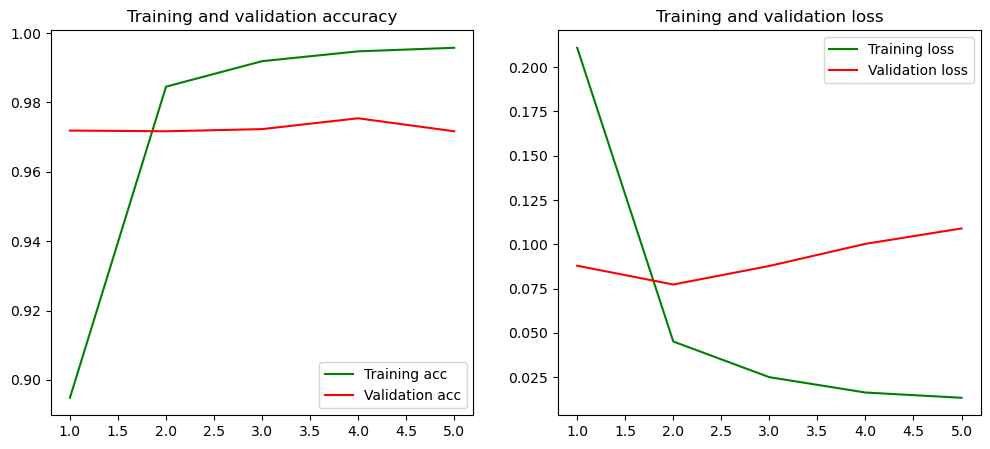

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'g', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'g', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
preds = [round(i[0]) for i in model.predict(X_test)]

150/150 [==============================] - 10s 63ms/step


In [24]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(y_test, preds)

<Figure size 640x480 with 0 Axes>

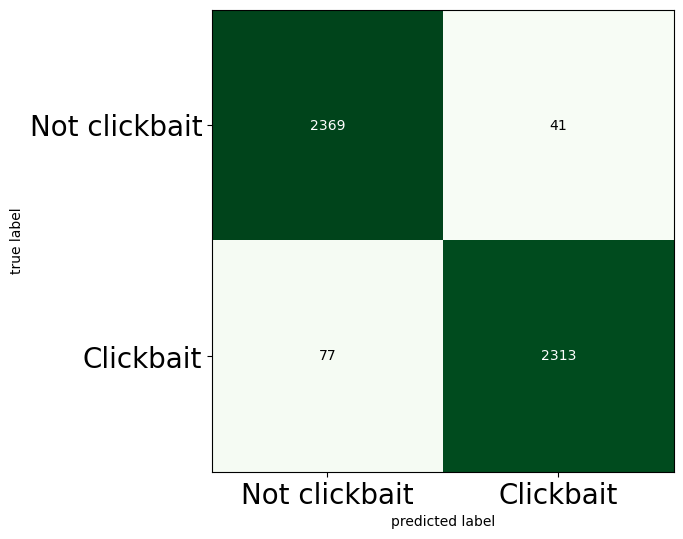

In [26]:
plt.figure()
plot_confusion_matrix(cm, figsize=(8,6),  cmap=plt.cm.Greens)
plt.xticks(range(2), ['Not clickbait', 'Clickbait'], fontsize=16)
plt.yticks(range(2), ['Not clickbait', 'Clickbait'], fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [27]:
tn, fp, fn, tp = cm.ravel()

In [28]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = 2*precision*recall/(precision+recall)

print("Accuracy of the model is {:.4f}".format(accuracy))
print("Precision of the model is {:.4f}".format(precision))
print("Recall of the model is {:.4f}".format(recall))
print("F1 score of the model is {:.4f}".format(f1_score))

Accuracy of the model is 0.9754
Precision of the model is 0.9826
Recall of the model is 0.9678
F1 score of the model is 0.9751


In [29]:
test = ['My biggest laugh reveal ever!',
        'Learning game development with Unity',
        'A tour of Japan\'s Kansai region',
        '12 things NOT to do in Europe',
        'How to train your dog in 5 easy steps',
        'The ultimate guide to weight loss',
        'Study finds no link between cell phone use and cancer',
        'New treatment shows promise in fighting off antibiotic-resistant infections'
       ]
vec_text = vectorizer(test)
ans = [round(i[0]) for i in model.predict(vec_text)]
for (text,res) in zip(test,ans):
  label = 'Clickbait' if res == 1.0 else 'Not Clickbait'
  print("{} - \033[1m{}\033[0m".format(text,label))

1/1 [==============================] - 1s 659ms/step
My biggest laugh reveal ever! - Clickbait
Learning game development with Unity - Not Clickbait
A tour of Japan's Kansai region - Not Clickbait
12 things NOT to do in Europe - Not Clickbait
How to train your dog in 5 easy steps - Clickbait
The ultimate guide to weight loss - Clickbait
Study finds no link between cell phone use and cancer - Not Clickbait
New treatment shows promise in fighting off antibiotic-resistant infections - Not Clickbait
